<a href="https://colab.research.google.com/github/azmiak/Kuliah-Deep-Learning/blob/main/Week%205%20/%20Tugas%20/%20TensorFlow_ReviewTokoBaju_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
# Load dataset
df = pd.read_csv("ReviewTokoBaju.csv")
texts = df['Review Text'].dropna().values
labels = df['Recommended IND'][df['Review Text'].notna()].values

# Vectorization and padding
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts).toarray()
max_len = 100
X_padded = pad_sequences(X, maxlen=max_len)
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
# Model RNN
model = Sequential([
    Embedding(input_dim=X.shape[1]+1, output_dim=128, input_length=max_len),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8118 - loss: 0.4959 - val_accuracy: 0.8207 - val_loss: 0.4725
Epoch 2/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.8166 - loss: 0.4847 - val_accuracy: 0.8207 - val_loss: 0.4712
Epoch 3/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8187 - loss: 0.4788 - val_accuracy: 0.8207 - val_loss: 0.4711
Epoch 4/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.8184 - loss: 0.4787 - val_accuracy: 0.8207 - val_loss: 0.4697
Epoch 5/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8202 - loss: 0.4756 - val_accuracy: 0.8207 - val_loss: 0.4689
Epoch 6/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8138 - loss: 0.4854 - val_accuracy: 0.8207 - val_loss: 0.4703
Epoch 7/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8190 - loss: 0.4767 - val_accuracy: 0.8207 - val_loss: 0.4696
Epoch 8/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8208 - loss: 0.4737 - 

In [ ]:
# Evaluation
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

train_acc = history.history['accuracy'][-1]
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_sq = f1_score(y_test, y_pred)**2
auc = roc_auc_score(y_test, y_prob)

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


Final Training Accuracy: 0.8184
Final Testing Accuracy: 0.8207
Precision: 0.8207
Recall: 1.0000
F1 Squared: 0.8128
AUC: 0.5413


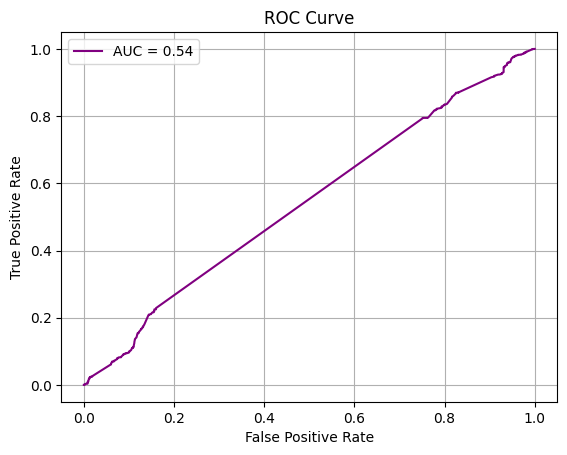

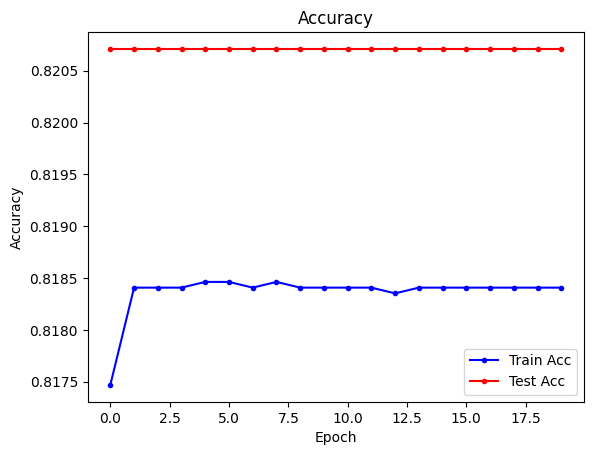

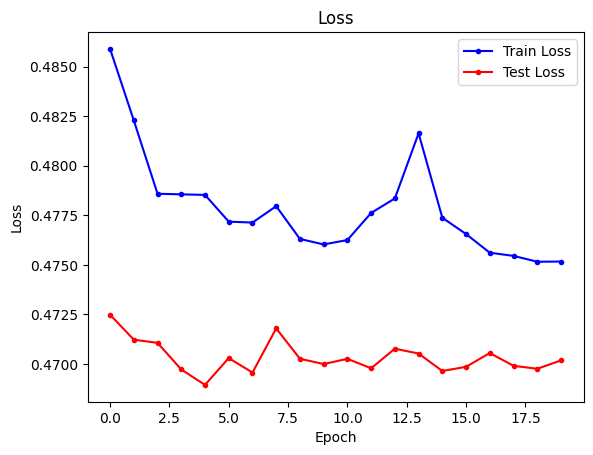

In [ ]:
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Testing Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_sq:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='purple')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc', color='blue', marker='.')
plt.plot(history.history['val_accuracy'], label='Test Acc', color='red', marker='.')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='.')
plt.plot(history.history['val_loss'], label='Test Loss', color='red', marker='.')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Loss')
plt.show()

#LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load dataset
df = pd.read_csv("ReviewTokoBaju.csv")
texts = df['Review Text'].dropna().values
labels = df['Recommended IND'][df['Review Text'].notna()].values

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
max_len = 100
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
# Model LSTM
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8334 - loss: 0.4137 - val_accuracy: 0.8892 - val_loss: 0.2562
Epoch 2/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9069 - loss: 0.2282 - val_accuracy: 0.8922 - val_loss: 0.2399
Epoch 3/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9296 - loss: 0.1841 - val_accuracy: 0.8889 - val_loss: 0.2475
Epoch 4/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9400 - loss: 0.1583 - val_accuracy: 0.8858 - val_loss: 0.2650
Epoch 5/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9496 - loss: 0.1361 - val_accuracy: 0.8883 - val_loss: 0.2785
Epoch 6/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9585 - loss: 0.1174 - val_accuracy: 0.8823 - val_loss: 0.3332
Epoch 7/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9680 - loss: 0.0911 - val_accuracy: 0.8863 - val_loss: 0.3152
Epoch 8/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9720 - loss: 0.0799 - val_accu

In [ ]:
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

train_acc = history.history['accuracy'][-1]
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_sq = f1_score(y_test, y_pred)**2
auc = roc_auc_score(y_test, y_prob)

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Final Training Accuracy: 0.9950
Final Testing Accuracy: 0.8766
Precision: 0.9195
Recall: 0.9311
F1 Squared: 0.8561
AUC: 0.8879


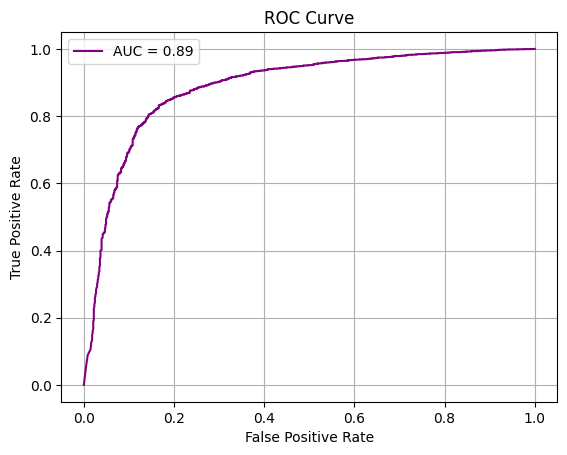

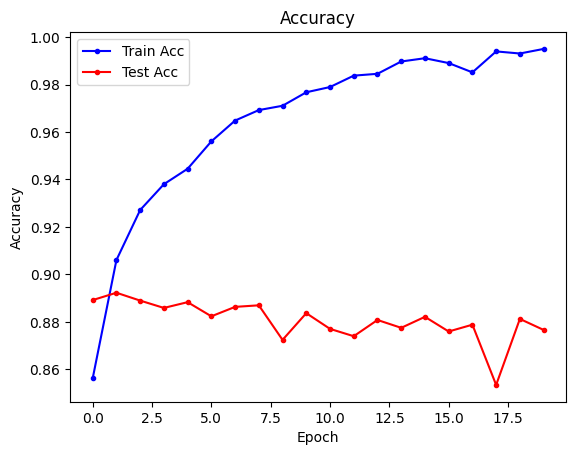

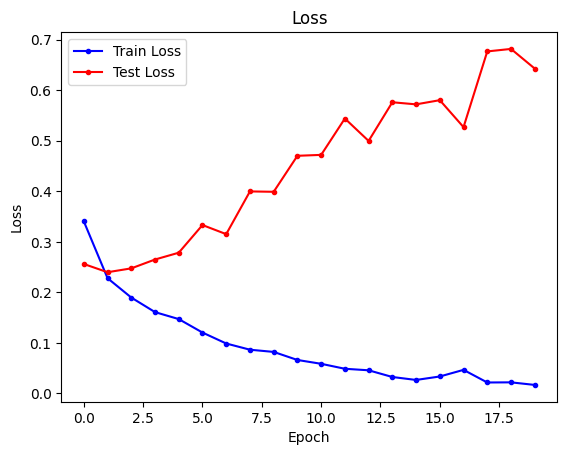

In [ ]:
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Testing Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_sq:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='purple')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc', color='blue', marker='.')
plt.plot(history.history['val_accuracy'], label='Test Acc', color='red', marker='.')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='.')
plt.plot(history.history['val_loss'], label='Test Loss', color='red', marker='.')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Loss')
plt.show()

#GRU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load dataset
df = pd.read_csv("ReviewTokoBaju.csv")
texts = df['Review Text'].dropna().values
labels = df['Recommended IND'][df['Review Text'].notna()].values

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding
max_len = 100
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
# Model GRU
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8240 - loss: 0.4446 - val_accuracy: 0.8717 - val_loss: 0.2886
Epoch 2/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8960 - loss: 0.2492 - val_accuracy: 0.8936 - val_loss: 0.2523
Epoch 3/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9269 - loss: 0.1900 - val_accuracy: 0.8953 - val_loss: 0.2625
Epoch 4/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9437 - loss: 0.1533 - val_accuracy: 0.8942 - val_loss: 0.2784
Epoch 5/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9587 - loss: 0.1173 - val_accuracy: 0.8916 - val_loss: 0.3145
Epoch 6/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9668 - loss: 0.0946 - val_accuracy: 0.8847 - val_loss: 0.3300
Epoch 7/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9779 - loss: 0.0675 - val_accuracy: 0.8777 - val_loss: 0.3846
Epoch 8/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9829 - loss: 0.0508 - val_accu

In [ ]:
# Evaluation
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

train_acc = history.history['accuracy'][-1]
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_sq = f1_score(y_test, y_pred)**2
auc = roc_auc_score(y_test, y_prob)

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


Final Training Accuracy: 0.9982
Final Testing Accuracy: 0.8669
Precision: 0.9097
Recall: 0.9301
F1 Squared: 0.8460
AUC: 0.8842


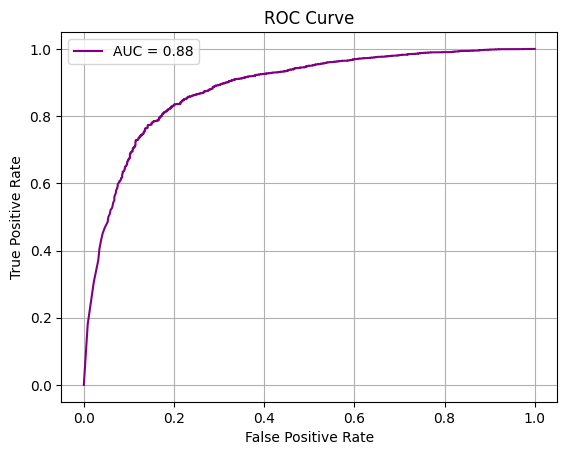

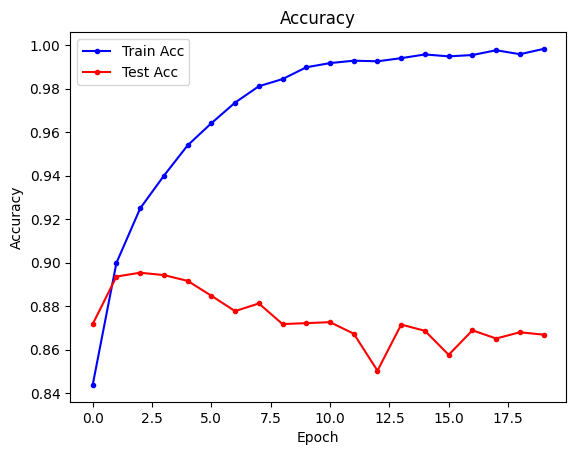

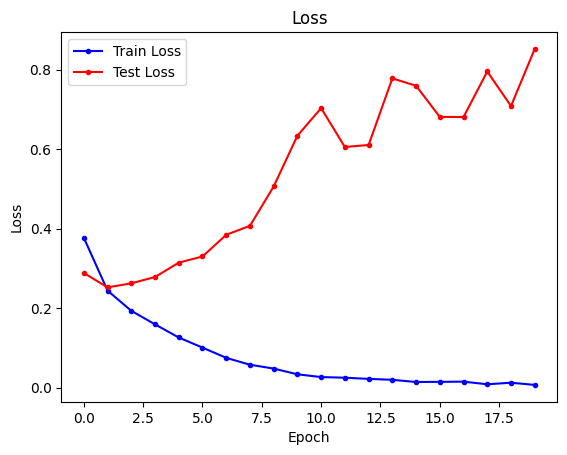

In [ ]:
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Testing Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_sq:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='purple')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc', color='blue', marker='.')
plt.plot(history.history['val_accuracy'], label='Test Acc', color='red', marker='.')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='.')
plt.plot(history.history['val_loss'], label='Test Loss', color='red', marker='.')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Loss')
plt.show()

#Persamaan Matematika pada DL

---

##1. RNN
RNN memproses urutan data dengan mempertahankan hidden state dari langkah sebelumnya. Persamaan matematikanya:

$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$

---

##2. LSTM
LSTM menggunakan tiga gate utama: forget gate, input gate, dan output gate, serta sebuah cell state yang menyimpan memori jangka panjang.

$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)$ (forget gate)

$i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)$ ,
$\tilde{C}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)$ (input gate)

$C_t = f_t . C_{t-1} + i_t . \tilde{C}_t$ (update cell state)

$o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)$ (output gate)

$h_t = o_t . \tanh(C_t)$ (hidden state)

---

##3. GRU
GRU menyederhanakan LSTM dengan dua gate.

$z_t = \sigma(W_z x_t + U_z h_{t-1})$ (update gate)

$r_t = σ(W_r x_t + U_r h_{t-1})$ (reset gate)

$\tilde{h_t} = tanh(W_h x_t + U_h (r_t . h_{t-1}))$ (kandidat hidden state)

$h_t = (1 - z_t) . h_{t-1} + z_t . \tilde{h_t}$ (final hidden state)

---

##4. Binary Cross-Entropy Loss
Untuk klasifikasi biner, fungsi loss adalah:

\[
\$mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]
$\]

($ y_i $): Label sebenarnya (0 atau 1)

($ \hat{y}_i $): Prediksi model

---

#Persamaan Matematika Evaluasi Model Klasifikasi
TP = True Positive

TN = True Negative

FP = False Positive

FN = False Negative

---

##1. Akurasi (Accuracy)
Akurasi mengukur seberapa sering model membuat prediksi yang benar dari keseluruhan data.

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

---

##2. Presisi (Precision)
Presisi mengukur seberapa akurat prediksi positif yang dibuat oleh model.

$Accuracy = \frac{TP}{TP + FP}$

---

##3. Recall (Sensitivity / True Positive Rate)
Recall mengukur seberapa banyak dari data positif yang berhasil ditangkap oleh model.

$Recall = \frac{TP}{TP + FN}$

---

##4. F1 Score
F1 Score adalah rata-rata harmonik dari precision dan recall.

$F1 = 2 \times \frac{(Precision \times Recall)}{(Precision + Recall)}$

F1 Squared adalah nilai F1 Score dipangkatkan 2.

$F1_{sq} = F1^2$

---

##5. ROC (Receiver Operating Characteristic) Curve
ROC adalah kurva yang menampilkan hubungan antara TPR (True Positive Rate) dan FPR (False Positive Rate).

$TPR = \frac{TP}{TP + FN}$

$FPR = \frac{TP}{FP + TN}$

Kurva ini dibentuk dengan memplot TPR vs FPR pada berbagai threshold klasifikasi.

---

##6. AUC (Area Under Curve):
AUC mengukur luas di bawah kurva ROC. Nilai berkisar antara 0-1. Semakin mendekati 1, semakin baik kemampuan model membedakan kelas positif dan negatif.

---